## Plot 0D Reactor Data

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

from numpy import diff

import cantera as ct

In [2]:
OutputDir  = WORKSPACE_PATH+'/ROMNet/Data/0DReact_Isobaric_100Cases_Highest/'

CasesVec   = [1]#[0,2,4,6,8]
DirDir     = OutputDir 

NVarsRed   = 7

InputVars  = []
for i in range(NVarsRed):
    InputVars.append('PC_'+str(i+1))
InputVars

['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7']

In [3]:
ICsVec = pd.read_csv(OutputDir+'/Orig/train/ext/ICs.csv').to_numpy()
P0sVec       = ICsVec[:,0]
EqRatio0sVec = ICsVec[:,1]
T0sVec       = ICsVec[:,2]

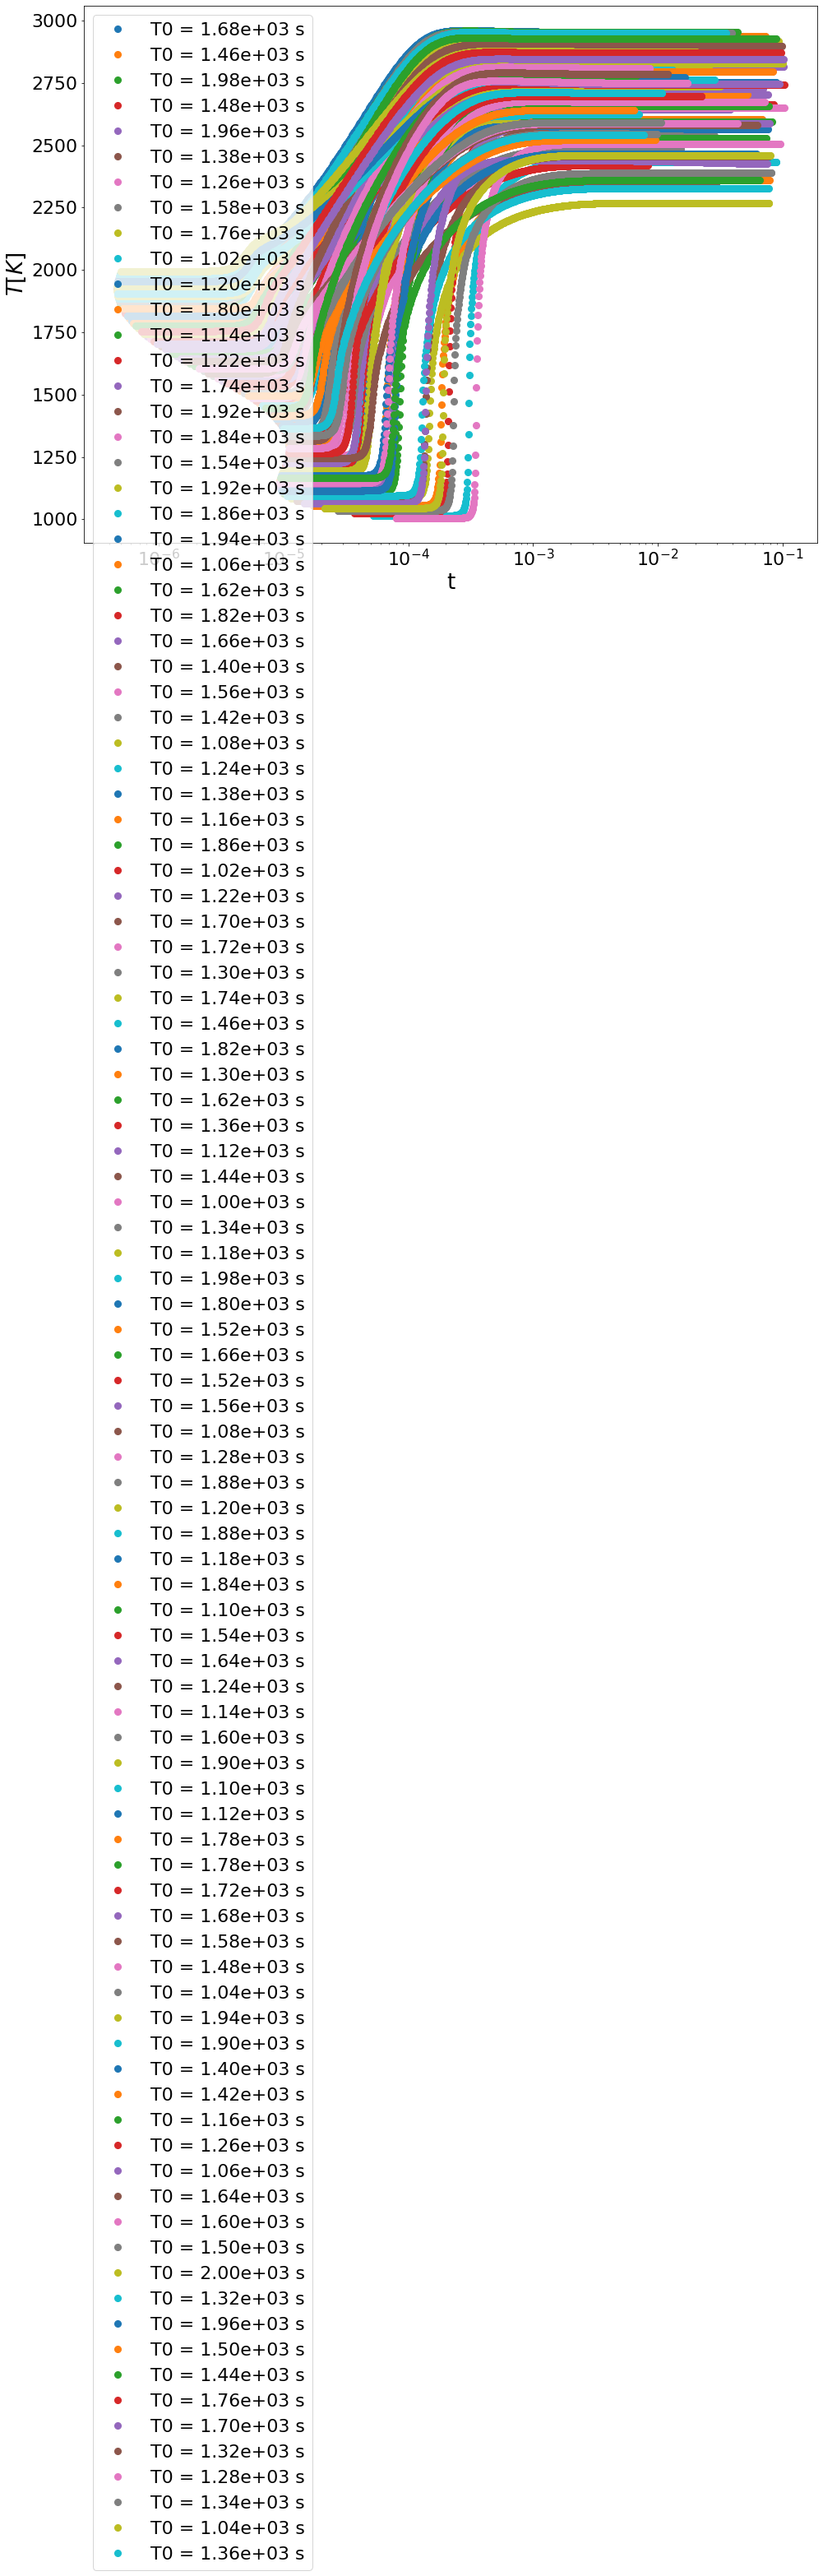

In [4]:
fig  = plt.figure(figsize=(16,12))
for i in range(len(T0sVec)):
    Data1 = pd.read_csv(OutputDir+'/Orig/train/ext/y.csv.'+str(i+1))
    
    plt.plot(Data1['t'], Data1['T'], 'o', label='T0 = '+"{:.2e}".format(T0sVec[i])+' s')
    
    plt.xlabel('t')
    plt.ylabel(r'$T [K]$')
    plt.legend()
    plt.xscale('log')

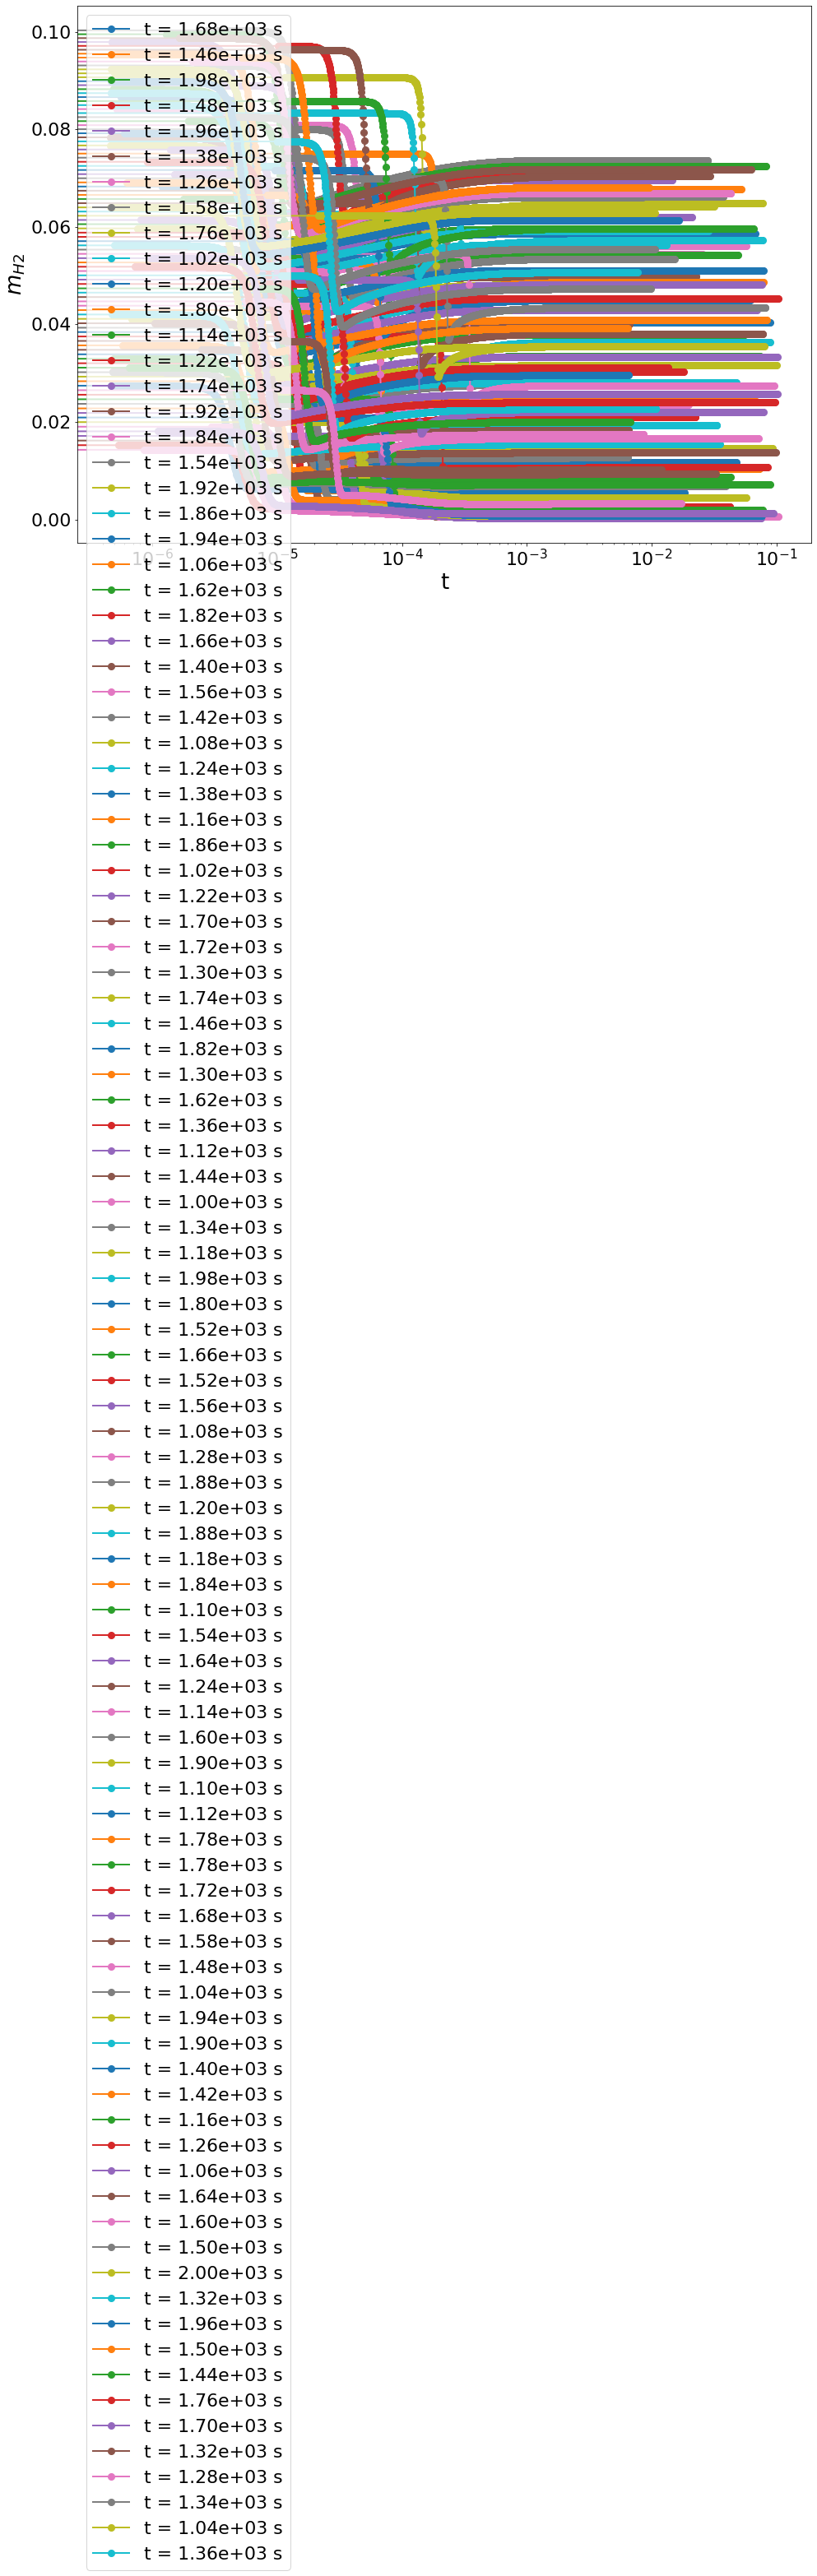

In [5]:
fig  = plt.figure(figsize=(16,12))
for i in range(len(T0sVec)):
    Data1 = pd.read_csv(OutputDir+'/Orig/train/ext/y.csv.'+str(i+1))
    
    plt.plot(Data1.t, Data1.H2, '-o', label='t = '+"{:.2e}".format(T0sVec[i])+' s')
    
    plt.xlabel('t')
    plt.ylabel(r'$m_{H2}$')
    plt.legend()
    plt.xscale('log')

y0_pca =  [-3.00329768e+01  2.96753562e-01  2.84795191e-01 -8.05704814e-03
  1.43649056e-02  6.43018379e-03 -3.94497889e-03]
y0_pca =  [-3.94604135e+01  3.60131130e-01 -7.16441169e-02  1.06049321e-01
  1.40910780e-02  3.26076950e-02 -1.38386087e-02]
y0_pca =  [-1.61157616e+01  3.68067130e-01  5.49024290e-01 -6.86854046e-02
  3.31212353e-02  2.52858826e-03 -1.49289240e-02]
y0_pca =  [-3.90115119e+01  3.49555743e-01 -4.26637784e-02  9.56736540e-02
  1.32628876e-02  2.97686594e-02 -1.21945345e-02]
y0_pca =  [-1.70137936e+01  3.17073351e-01  6.05685249e-01 -9.51117023e-02
  2.67470640e-02 -6.99555074e-03 -7.01986213e-03]
y0_pca =  [-4.30518587e+01  3.71447464e-01 -1.87050476e-01  1.41130101e-01
  1.25589084e-02  3.98770852e-02 -1.56167155e-02]
y0_pca =  [-4.88890910e+01  3.22826236e-02  1.93487732e-01 -3.56795637e-02
 -2.97308947e-02 -2.36534653e-02  3.69880863e-02]
y0_pca =  [-3.45229176e+01  1.10869601e-01  4.58339405e-01 -9.50116882e-02
 -9.81597083e-03 -2.66330204e-02  2.48779892e-02]


y0_pca =  [-3.18291898e+01  1.47766272e-01  4.72789223e-01 -9.16442734e-02
 -3.61506980e-03 -2.25218194e-02  1.91677482e-02]
y0_pca =  [-3.31759786e+01  1.53004709e-01  4.27931304e-01 -7.78384419e-02
 -4.07889898e-03 -1.95861726e-02  1.83465582e-02]
y0_pca =  [-3.76653363e+01  1.50995206e-01  3.09339931e-01 -4.45516878e-02
 -7.79234721e-03 -1.39035799e-02  1.86312526e-02]
y0_pca =  [-1.56668542e+01  3.59352590e-01  5.75048156e-01 -7.78442041e-02
  3.25001794e-02  8.16680902e-05 -1.35736630e-02]
y0_pca =  [-4.57460200e+01  1.97854755e-01  1.56792863e-02  4.83727705e-02
 -8.85789801e-03  6.96146519e-03  1.13094626e-02]
y0_pca =  [-1.74626367e+01  3.46098460e-01  5.47392407e-01 -7.26711709e-02
  2.96289295e-02 -2.68812546e-04 -1.15274294e-02]
y0_pca =  [-3.81144513e+01  9.42908493e-02  3.87252129e-01 -7.81723984e-02
 -1.44531975e-02 -2.52416480e-02  2.74293450e-02]
y0_pca =  [-4.03585714e+01  2.69454585e-01  4.80639257e-02  5.36731921e-02
  3.29973986e-03  1.47216529e-02  2.29425254e-04]


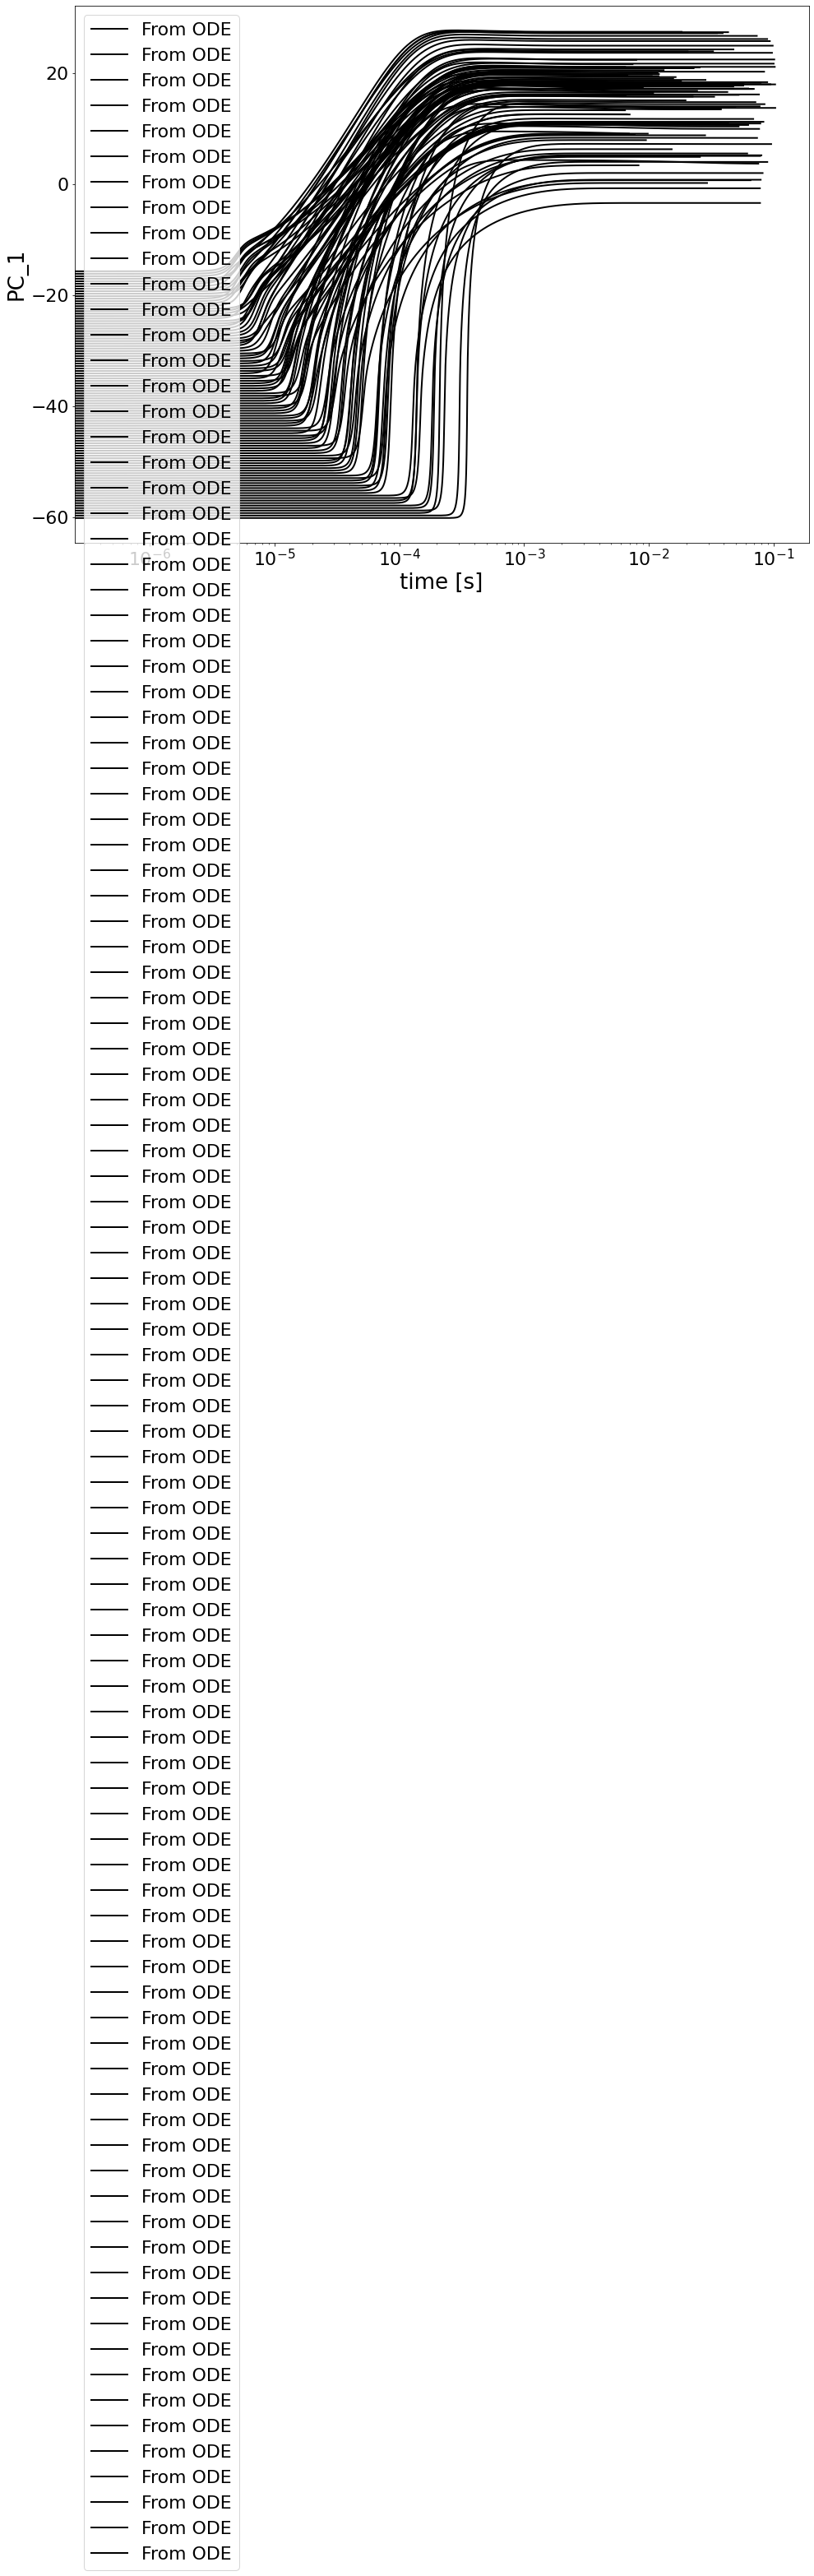

In [6]:
### Evaluating on Test Data

iPC    = 0

fig = plt.figure(figsize=(16,12))
for iTest in range(len(T0sVec)):

    FileName                     = DirDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.'+str(iTest+1)
    InputDataTest                = pd.read_csv(FileName, header=0)
    tVec                         = InputDataTest['t'].to_numpy()
    #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
    yMat_pca                     = InputDataTest[InputVars].to_numpy()
    y0_pca                       = yMat_pca[0,:]
    print('y0_pca = ', y0_pca)
    
    plt.plot(tVec, yMat_pca[:,iPC], '-k', label='From ODE', lw=2)

plt.xscale('log')
plt.xlabel('time [s]')
plt.ylabel('PC_'+str(iPC+1))
plt.legend()

In [7]:
FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/A.csv'
A        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/C.csv'
C        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/D.csv'
D        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

Text(0, 0.5, 'H')

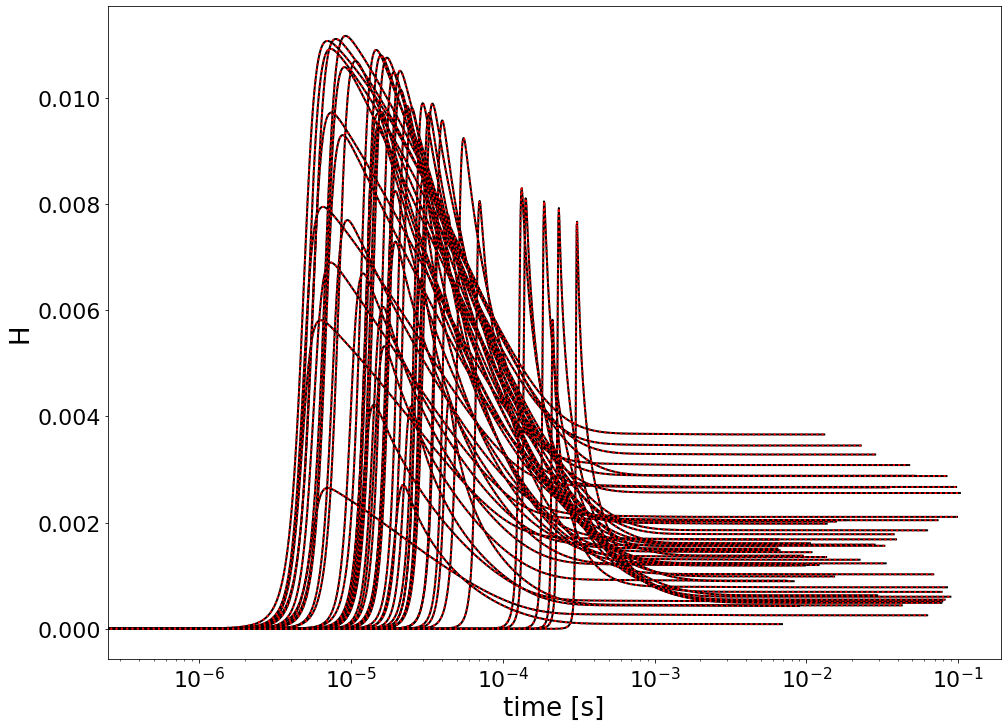

In [8]:
CasesVec = np.arange(1,100,2)

FileName = DirDir +'/Orig/train/ext/CleanVars.csv'
Data     = pd.read_csv(FileName, header=None)
VarNames = list(Data.to_numpy()[0,:])

VarOI    = 'H'
iVar     = VarNames.index(VarOI)
        
fig = plt.figure(figsize=(16,12))
for iTest in CasesVec:

    FileName                     = DirDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.'+str(iTest+1)
    InputDataTest                = pd.read_csv(FileName, header=0)
    tVec                         = InputDataTest['t'].to_numpy()
    #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
    yMat_pca                     = InputDataTest[InputVars].to_numpy()
    yMat_                        = (yMat_pca.dot(A))*D[:,0] + C[:,0]
    
    FileName     = DirDir +'/Orig/train/ext/y.csv.'+str(iTest+1)
    Data         = pd.read_csv(FileName, header=0)
    tVec         = Data.to_numpy()[:,0]
    yMat         = Data.to_numpy()[:,1:]
    VarOrig      = list(Data.columns)
    iVarOrig     = VarOrig.index(VarOI)-1
        
    plt.plot(tVec, yMat[:,iVarOrig],  '-k', label='From ODE',                   lw=2)
    plt.plot(tVec, yMat_[:,iVar], ':r', label='From Surrogate Source Term', lw=2)
    
    if tVec[-1] > 3.e-1:
        print('iTest = ', iTest)

plt.xscale('log')
#plt.yscale('log')
plt.xlabel('time [s]')
plt.ylabel(VarOI)
#plt.legend()